In [140]:
import numpy as np
import tensorflow as tf
import random

SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

import d2d
import importlib
importlib.reload(d2d)
import pandas as pd
import os




In [141]:
file = "/data/fast0/datasets/Rhone_data_continuous_highpass.h5"

filt = 'Highpass'

history = {}
val_performance = {}
performance = {}

#window_width = [1,2,5, 200]
#window_width = [350, 400, 450, 500]
window_width = [20,50,100, 200]

for window_input_width in window_width:
    
#     SEED = 1
#     random.seed(SEED)
#     np.random.seed(SEED)
#     tf.random.set_seed(SEED)
    
    linear_model, lstm_model, dnn_model,  df_all_chan,  input_columns  = d2d.import_data(filename = file)

    da = df_all_chan.to_numpy()

    window_input_width = window_input_width

    multi_step_window_shuffled = d2d.WindowGenerator(df_all_chan,
                                                    input_width=window_input_width,
                                                    label_width=1, 
                                                    shift=0,
                                                    label_columns=['Discharge'],
                                                    input_columns=input_columns,
                                                    shuffle=True,
                                                    batch_size=72)
    
    
    import matplotlib
    import matplotlib.pyplot as plt
    
    
    
    #plt.imshow(multi_step_window_shuffled.train_channels_normed[0][0])
    
    print(np.array(multi_step_window_shuffled.train_channels_normed[0][0]).shape)
    #plt.imshow(multi_step_window_shuffled.train_channels_normed[0][0],aspect='auto', vmin = -1, vmax=1)

    history['lstm_'+str(window_input_width)+'_'+filt] = d2d.compile_and_fit(lstm_model, multi_step_window_shuffled, learning_rate = 0.001)
#     #history['conv_'+str(width)] = d2d.compile_and_fit(conv_model, multi_step_window_shuffled, learning_rate = 0.001)

    val_performance['lstm_'+str(window_input_width)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.val)
    performance['lstm_'+str(window_input_width)+'_'+filt] = lstm_model.evaluate(multi_step_window_shuffled.test, verbose=0)


Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
(20, 2308)
Epoch 1/100
30/30 [==============================] - 2s 28ms/step - loss: 0.5204 - mean_absolute_error: 0.5623 - val_loss: 0.3037 - val_mean_absolute_error: 0.4234
Epoch 2/100
30/30 [==============================] - 1s 20ms/step - loss: 0.2390 - mean_absolute_error: 0.3788 - val_loss: 0.2099 - val_mean_absolute_error: 0.3408
Epoch 3/100
30/30 [==============================] - 1s 20ms/step - loss: 0.1603 - mean_absolute_error: 0.3064 - val_loss: 0.1501 - val_mean_absolute_error: 0.2974
Epoch 4/100
30/30 [==============================] - 1s 20ms/step - loss: 0.1106 - mean_absolute_error: 0.2503 - val_loss: 0.1206 - val_mean_absolute_error: 0.2590
Epoch 5/100
30/30 [==============================] - 1s 20ms/step - loss: 0.0822 - mean_absolute_error: 0.2158 - val_loss: 0.1168 - val_mean_absolute_error: 0.2478
Epoch 6/100
30/30 [==============================] - 1s 20ms/step - loss: 0.0647 - mean_absolute_error: 0.1908 - 

12/12 [==============================] - 1s 48ms/step - loss: 0.0106 - mean_absolute_error: 0.0746 - val_loss: 0.1101 - val_mean_absolute_error: 0.1792
Epoch 19/100
12/12 [==============================] - 1s 48ms/step - loss: 0.0089 - mean_absolute_error: 0.0677 - val_loss: 0.1057 - val_mean_absolute_error: 0.1653
Epoch 20/100
12/12 [==============================] - 1s 48ms/step - loss: 0.0076 - mean_absolute_error: 0.0612 - val_loss: 0.1037 - val_mean_absolute_error: 0.1667
Epoch 21/100
12/12 [==============================] - 1s 47ms/step - loss: 0.0090 - mean_absolute_error: 0.0665 - val_loss: 0.1051 - val_mean_absolute_error: 0.1674
Epoch 22/100
12/12 [==============================] - 1s 48ms/step - loss: 0.0093 - mean_absolute_error: 0.0698 - val_loss: 0.1037 - val_mean_absolute_error: 0.1654
Epoch 23/100
12/12 [==============================] - 1s 48ms/step - loss: 0.0084 - mean_absolute_error: 0.0657 - val_loss: 0.1047 - val_mean_absolute_error: 0.1716
Epoch 24/100
3/3 [=====

6/6 [==============================] - 1s 99ms/step - loss: 0.0019 - mean_absolute_error: 0.0306 - val_loss: 0.0845 - val_mean_absolute_error: 0.1387
Epoch 44/100
1/1 [==============================] - 0s 105ms/step - loss: 0.0914 - mean_absolute_error: 0.1427
Keys: <KeysViewHDF5 ['DAS Data', 'Discharge', 'Times']>
(200, 2308)
Epoch 1/100
3/3 [==============================] - 2s 377ms/step - loss: 1.3641 - mean_absolute_error: 0.9479 - val_loss: 0.6576 - val_mean_absolute_error: 0.6252
Epoch 2/100
3/3 [==============================] - 1s 267ms/step - loss: 0.4746 - mean_absolute_error: 0.5712 - val_loss: 0.5773 - val_mean_absolute_error: 0.6104
Epoch 3/100
3/3 [==============================] - 1s 274ms/step - loss: 0.4766 - mean_absolute_error: 0.5681 - val_loss: 0.5368 - val_mean_absolute_error: 0.5905
Epoch 4/100
3/3 [==============================] - 1s 275ms/step - loss: 0.3853 - mean_absolute_error: 0.5065 - val_loss: 0.4613 - val_mean_absolute_error: 0.5109
Epoch 5/100
3/3 [==

3/3 [==============================] - 1s 270ms/step - loss: 0.0053 - mean_absolute_error: 0.0361 - val_loss: 0.0830 - val_mean_absolute_error: 0.1547
Epoch 49/100
3/3 [==============================] - 1s 273ms/step - loss: 0.0071 - mean_absolute_error: 0.0435 - val_loss: 0.0848 - val_mean_absolute_error: 0.1622
Epoch 50/100
3/3 [==============================] - 1s 265ms/step - loss: 0.0133 - mean_absolute_error: 0.0610 - val_loss: 0.0851 - val_mean_absolute_error: 0.1612
Epoch 51/100
3/3 [==============================] - 1s 265ms/step - loss: 0.0080 - mean_absolute_error: 0.0489 - val_loss: 0.0854 - val_mean_absolute_error: 0.1620
Epoch 52/100
3/3 [==============================] - 1s 277ms/step - loss: 0.0086 - mean_absolute_error: 0.0528 - val_loss: 0.0839 - val_mean_absolute_error: 0.1618
Epoch 53/100
3/3 [==============================] - 1s 278ms/step - loss: 0.0068 - mean_absolute_error: 0.0489 - val_loss: 0.0855 - val_mean_absolute_error: 0.1650
Epoch 54/100
3/3 [===========

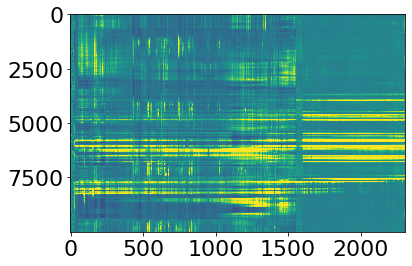

In [128]:
#plt.imshow(multi_step_window_shuffled.train_channels_normed[1][0],aspect='auto', vmin = -2, vmax=2)

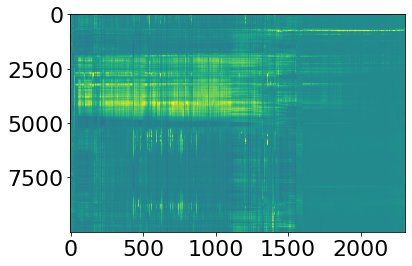

In [130]:
#plt.imshow(multi_step_window_shuffled.train_channels_normed[1][1],aspect='auto', vmin = -5, vmax=5)

In [142]:
#plt.imshow(multi_step_window_shuffled.train_channels_normed[0][16])

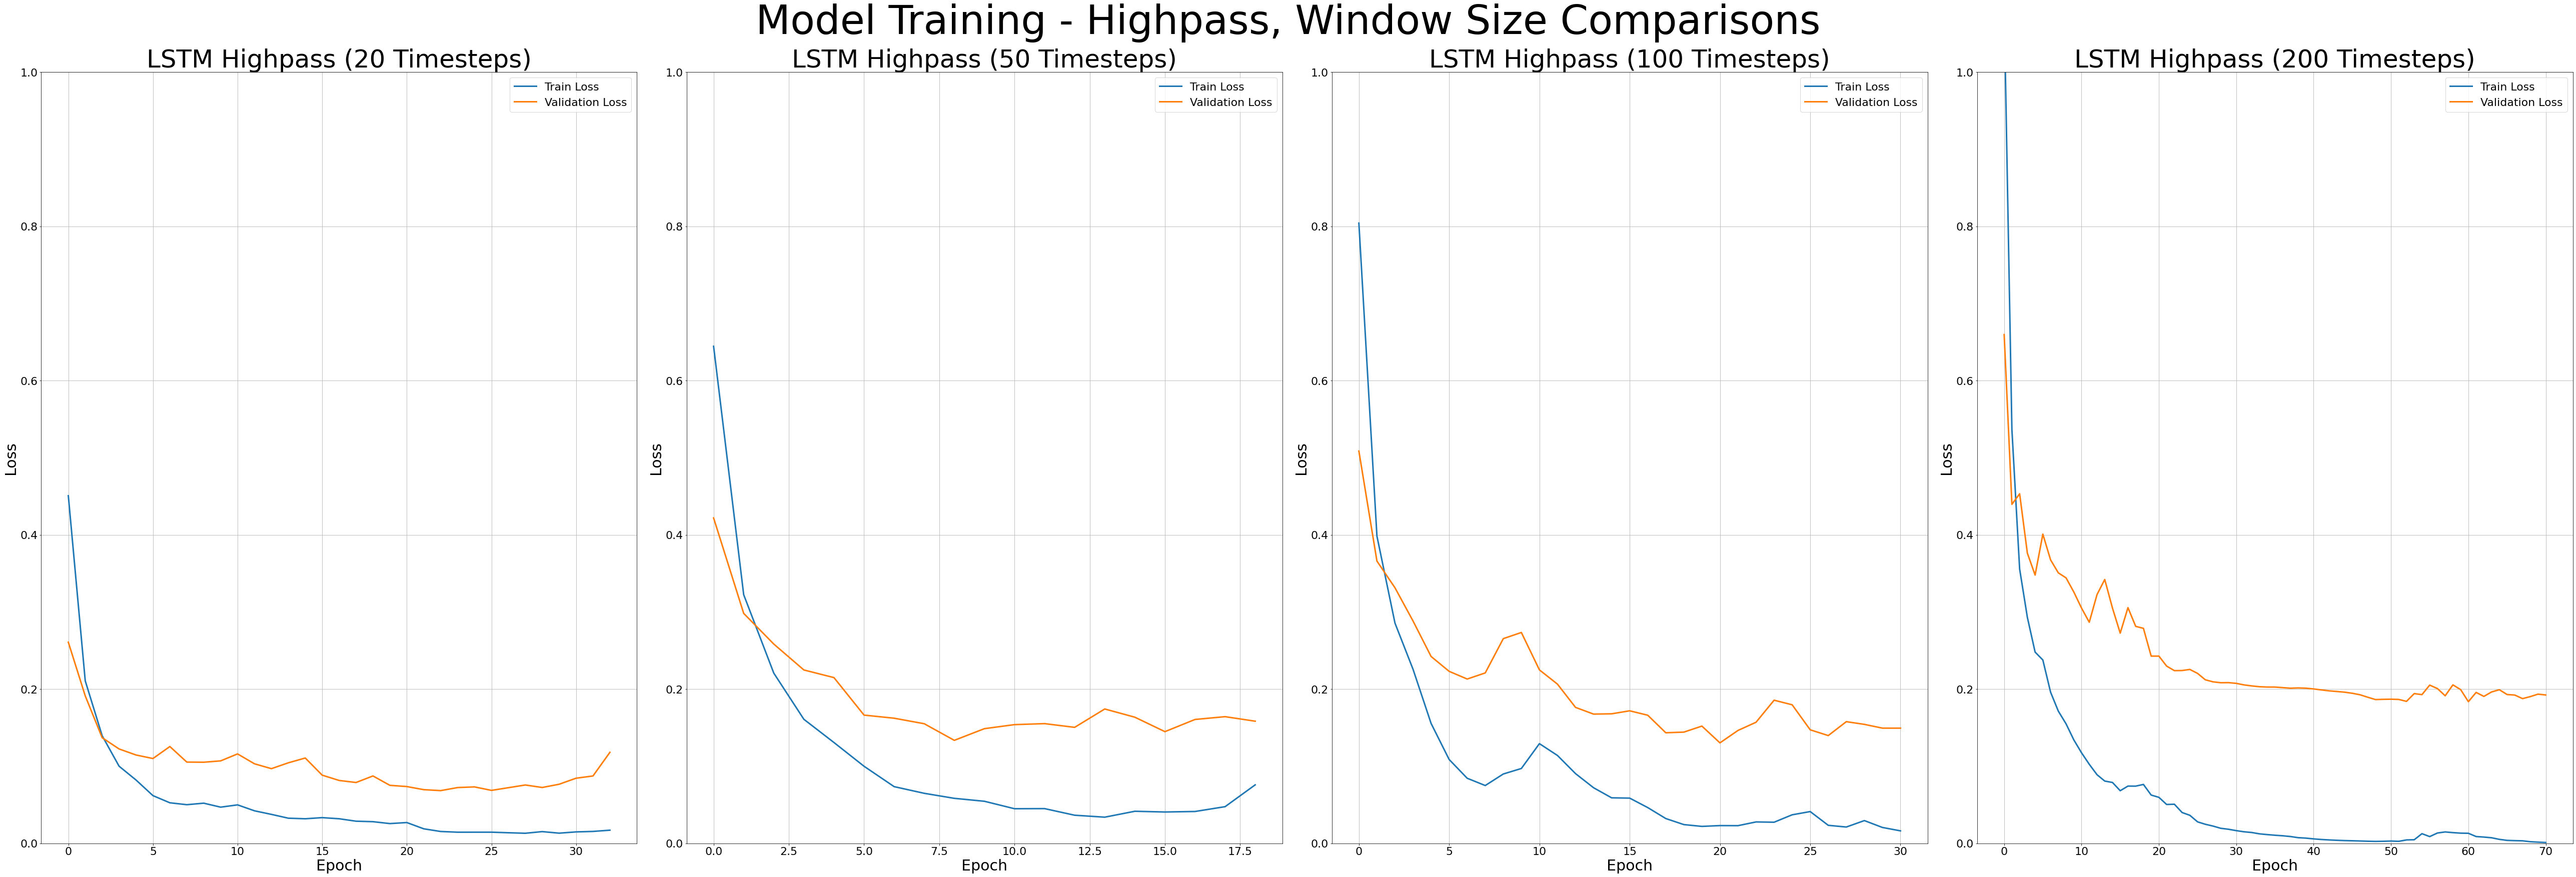

In [138]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 22})

fig, (ax0,ax1,ax2, ax3) = plt.subplots(nrows=1, 
                                 ncols=4, 
                                 sharey=False, 
                                 sharex=False,
                                 figsize=(72,25))
fig.patch.set_facecolor('white')

for ax, hist, title in zip((ax0,ax1,ax2, ax3), 
                           ('lstm_'+str(window_width[0])+'_Highpass','lstm_'+str(window_width[1])+'_Highpass','lstm_'+str(window_width[2])+'_Highpass', 'lstm_'+str(window_width[3])+'_Highpass'),
                            ('LSTM Highpass ('+str(window_width[0])+' Timesteps)','LSTM Highpass ('+str(window_width[1])+' Timesteps)','LSTM Highpass ('+str(window_width[2])+' Timesteps)','LSTM Highpass ('+str(window_width[3])+' Timesteps)' )):
    ax.plot(history[hist].history['loss'], label='Train Loss',linewidth=3)
    ax.plot(history[hist].history['val_loss'], label='Validation Loss',linewidth=3)
    ax.grid(True)
    ax.legend()
    ax.set_title(title,size=50)
    ax.set_ylabel('Loss', size=30)
    ax.set_xlabel('Epoch', size=30)
    ax.set_ylim((0, 1))
    

fig.suptitle('Model Training - Highpass, Window Size Comparisons', fontsize = 80)

plt.tight_layout()
plt.show()

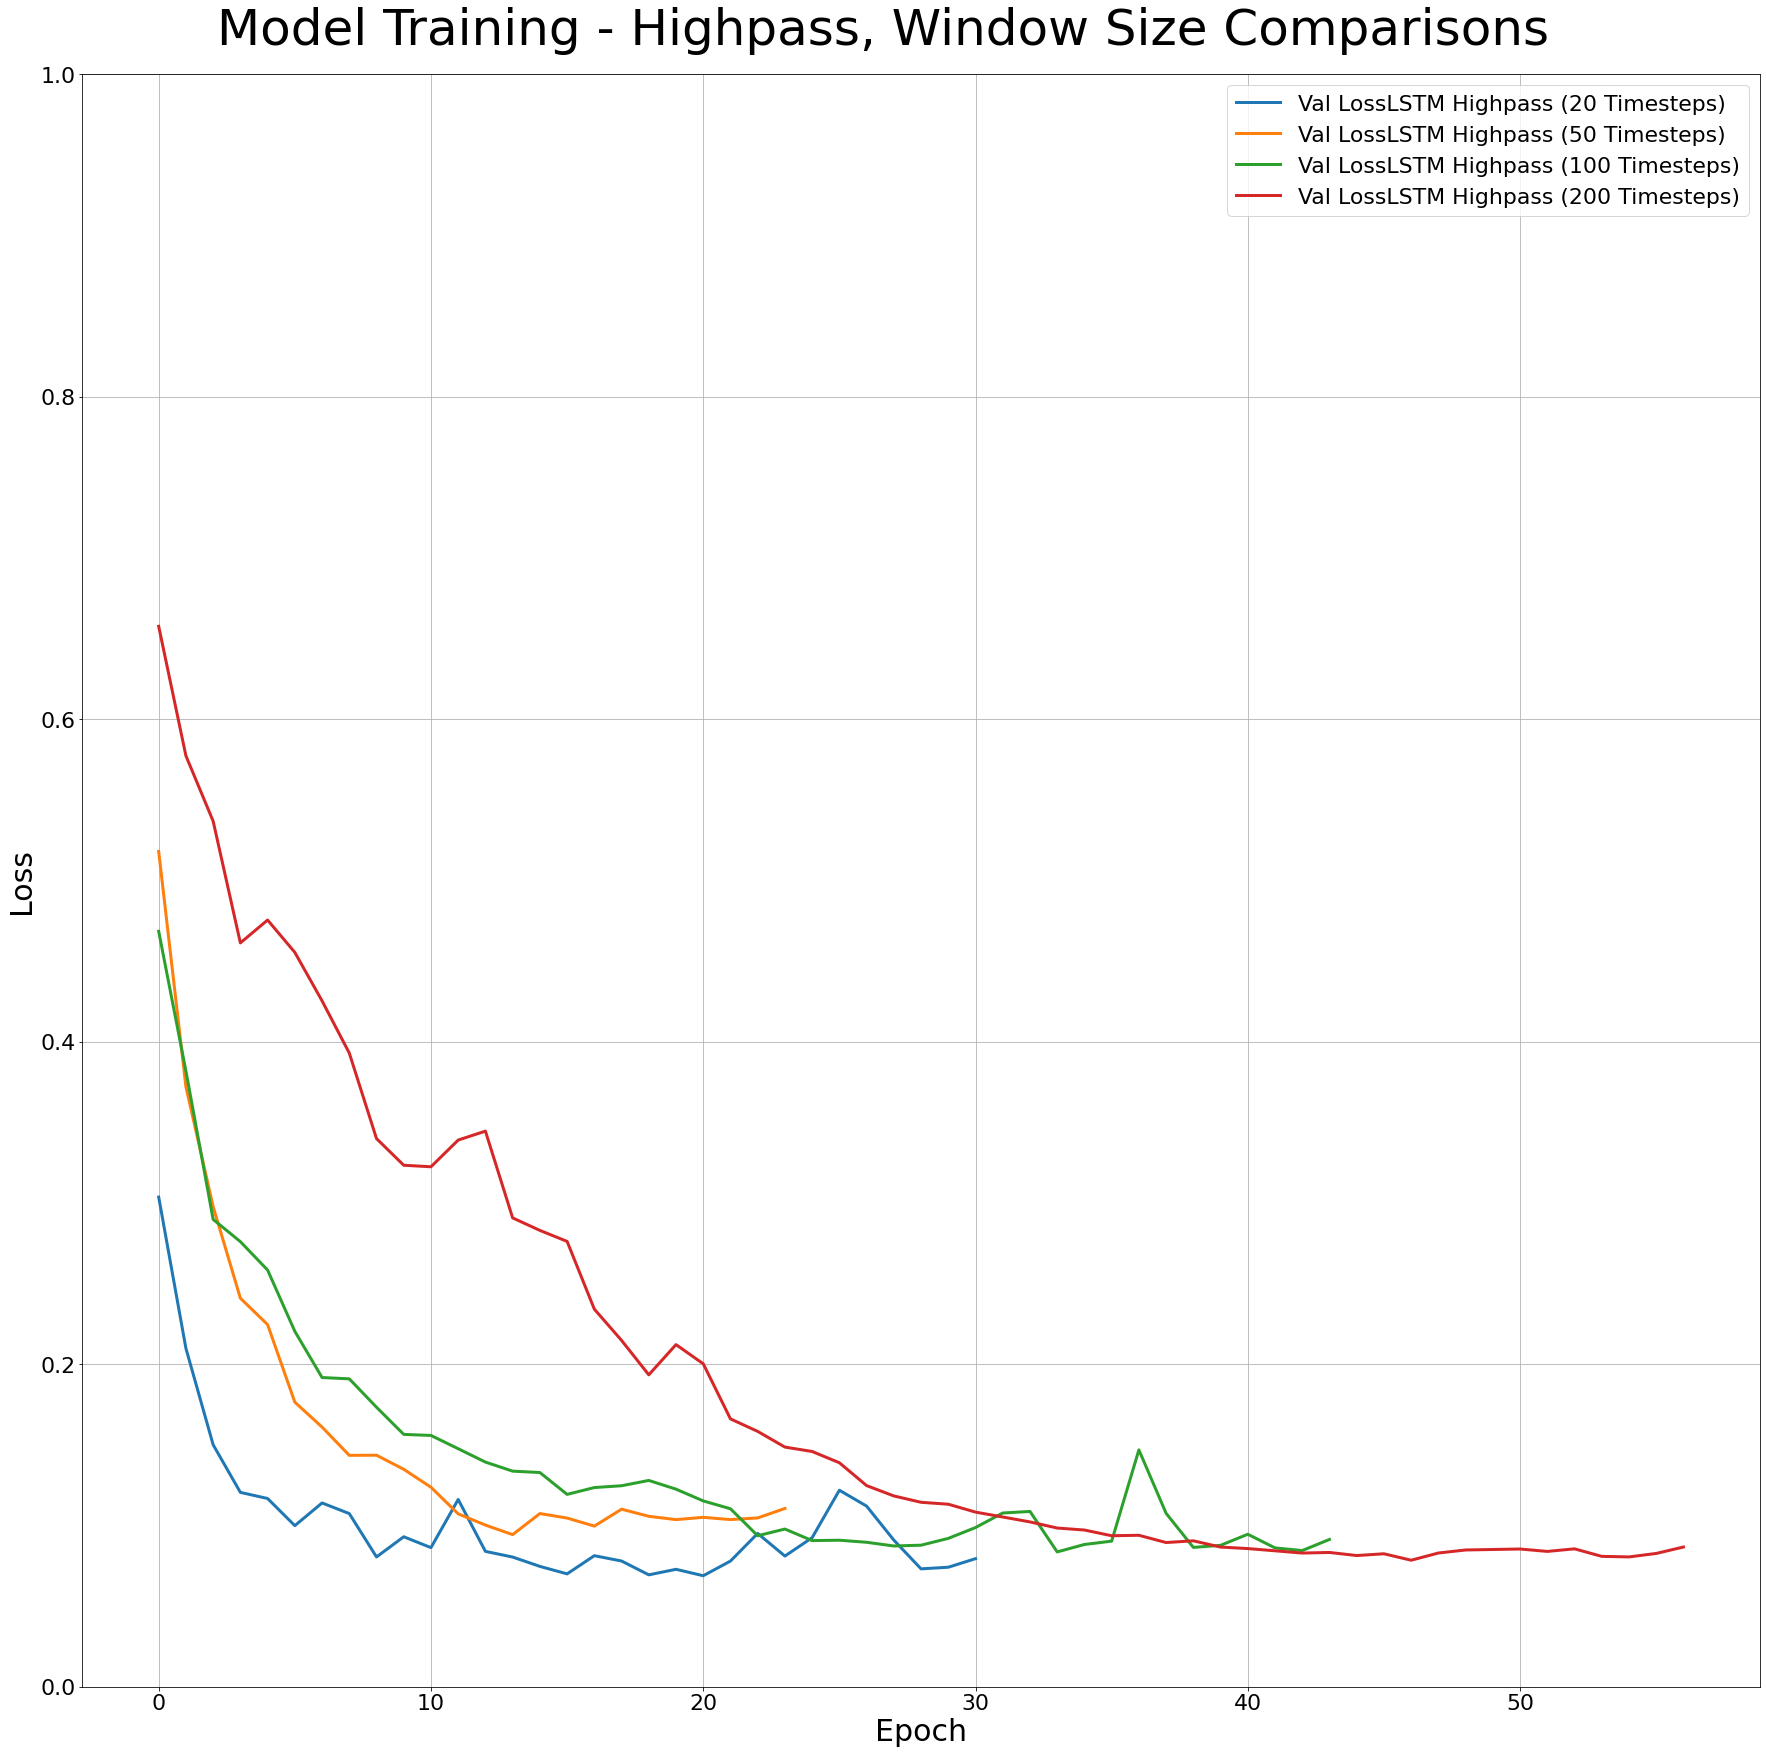

In [144]:
fig, ax = plt.subplots(figsize=(25,25))
for hist, legend in zip(('lstm_'+str(window_width[0])+'_Highpass','lstm_'+str(window_width[1])+'_Highpass','lstm_'+str(window_width[2])+'_Highpass', 'lstm_'+str(window_width[3])+'_Highpass'),
                            ('LSTM Highpass ('+str(window_width[0])+' Timesteps)','LSTM Highpass ('+str(window_width[1])+' Timesteps)','LSTM Highpass ('+str(window_width[2])+' Timesteps)','LSTM Highpass ('+str(window_width[3])+' Timesteps)' )):
    
    #ax.plot(history[hist].history['loss'], label='Train Loss'+legend,linewidth=3)
    ax.plot(history[hist].history['val_loss'], label='Val Loss'+legend,linewidth=3)
    
fig.patch.set_facecolor('white')
ax.set_ylabel('Loss', size=30)
ax.set_xlabel('Epoch', size=30)
ax.set_ylim((0, 1))
ax.grid()
ax.legend()
fig.suptitle('Model Training - Highpass, Window Size Comparisons', fontsize = 50)

plt.tight_layout()
plt.show()